<a href="https://colab.research.google.com/github/Thaisams/ML---Credit-Scoring/blob/main/ML_Credit_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
url = 'https://raw.githubusercontent.com/alura-cursos/credit_scoring/main/base_dados_traduzida.csv'
dados = pd.read_csv(url)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   default                      1000 non-null   int64 
 1   conta_corrente               1000 non-null   object
 2   prazo_emprestimo_meses       1000 non-null   int64 
 3   historico_credito            1000 non-null   object
 4   proposito_emprestimo         1000 non-null   object
 5   valor_emprestimo             1000 non-null   int64 
 6   reserva_cc                   1000 non-null   object
 7   tempo_emprego_atual          1000 non-null   object
 8   taxa_comp_salario            1000 non-null   int64 
 9   sexo_est_civil               1000 non-null   object
 10  outros_fiadores              1000 non-null   object
 11  anos_residencia_atual        1000 non-null   int64 
 12  propriedade                  1000 non-null   object
 13  idade                        1000 

In [ ]:
linhas = dados.shape[0]
colunas = dados.shape[1]

print('A base dados possui %s linhas e %s colunas.' %(linhas, colunas))

A base dados possui 1000 linhas e 21 colunas.


In [ ]:
duplicados = dados.duplicated()
duplicados = duplicados.sum()

print('A base dados possui %s duplicados.' %(duplicados))

A base dados possui 0 duplicados.


In [ ]:
nulos = dados.isnull()
nulos.sum()

,0
default,0
conta_corrente,0
prazo_emprestimo_meses,0
historico_credito,0
proposito_emprestimo,0
valor_emprestimo,0
reserva_cc,0
tempo_emprego_atual,0
taxa_comp_salario,0
sexo_est_civil,0


In [ ]:
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [ ]:
y = dados['default']
y.head()

,default
0,0
1,1
2,0
3,0
4,1


In [ ]:
x = dados.drop(columns = 'default')
x.head()

,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [ ]:
from sklearn.model_selection import train_test_split

SEED = 77
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.30, random_state = SEED)
base_treino = treino_x.shape[0]
base_teste = teste_x.shape[0]

print('A base de treino possui %s linhas e a base de teste possui %s linhas.' %(base_treino, base_teste))

A base de treino possui 700 linhas e a base de teste possui 300 linhas.


In [ ]:
dados['conta_corrente'].unique()

array(['< 0 DM', '0 <= ... < 200 DM', 'no checking account',
       '>= 200 DM / salary assignments for at least 1 year'], dtype=object)

In [ ]:
# Dicionários para mapeamento
a = {
    '< 0 DM':1,
    '0 <= ... < 200 DM':2,
    'no checking account':3,
    '>= 200 DM / salary assignments for at least 1 year':4
}

b = {
    'critical account/ other credits existing (not at this bank)': 1,
    'existing credits paid back duly till now': 2,
    'delay in paying off in the past': 3,
    'no credits taken/ all credits paid back duly': 4,
    'all credits at this bank paid back duly': 5
}

c = {
    'unknown/ no savings account': 1,
    '... < 100 DM': 2,
    '500 <= ... < 1000 DM ': 3,
    '.. >= 1000 DM ': 4,
    '100 <= ... < 500 DM': 5
}

d = {
    '.. >= 7 years':1,
    '1 <= ... < 4 years':2,
    '4 <= ... < 7 years':3,
    'unemployed':4,
    '... < 1 year ':5
}

e = {
    'male : single':1,
    'female : divorced/separated/married':2,
    'male : divorced/separated':3,
    'male : married/widowed':4
}


f = {
    'real estate':1,
    'if not A121 : building society savings agreement/ life insurance':2,
    'unknown / no property':3,
    'if not A121/A122 : car or other, not in attribute 6':4
}

g = {
    'none':1,
    'bank':2,
    'stores':3
}

h = {
    'skilled employee / official':1,
    'unskilled - resident':2,
    'management/ self-employed/ highly qualified employee/ officer':3,
    'unemployed/ unskilled - non-resident':4
}

i = {
    'domestic appliances':1,
    '(vacation - does not exist?)':2,
    'radio/television':3,
    'car (new)':4,
    'car (used)':5,
    'business':6,
    'repairs':7,
    'education':8,
    'furniture/equipment':9,
    'retraining':10
}

j = {
    'own':1,
    'for free':2,
    'rent':3
}

k = {
    'yes, registered under the customers name ':1,
    'none':2

}

l = {
    'yes':1,
    'no':2
}

m = {
    'none':1,
    'guarantor':2,
    'co-applicant':3
}



# Aplicando o mapeamento nas colunas
dados['conta_corrente'] = dados['conta_corrente'].map(a)
dados['historico_credito'] = dados['historico_credito'].map(b)
dados['reserva_cc'] = dados['reserva_cc'].map(c)
dados['tempo_emprego_atual'] = dados['tempo_emprego_atual'].map(d)
dados['sexo_est_civil'] = dados['sexo_est_civil'].map(e)
dados['propriedade'] = dados['propriedade'].map(f)
dados['outros_planos_financiamento'] = dados['outros_planos_financiamento'].map(g)
dados['status_emprego'] = dados['status_emprego'].map(h)
dados['proposito_emprestimo'] = dados['proposito_emprestimo'].map(i)
dados['tipo_residencia'] = dados['tipo_residencia'].map(j)
dados['telefone'] = dados['telefone'].map(k)
dados['trabalhador_estrangeiro'] = dados['trabalhador_estrangeiro'].map(l)
dados['outros_fiadores'] = dados['outros_fiadores'].map(m)


# Visualizando os dados transformados
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,1,1169,1,1,4,1,...,4,1,67,1,1,2,1,1,1,1
1,1,2,48,2,1,5951,2,2,2,2,...,2,1,22,1,1,1,1,1,2,1
2,0,3,12,1,2,2096,2,3,2,1,...,3,1,49,1,1,1,2,2,2,1
3,0,1,42,2,3,7882,2,3,2,1,...,4,2,45,1,2,1,1,2,2,1
4,1,1,24,3,4,4870,2,2,3,1,...,4,3,53,1,2,2,1,2,2,1


In [ ]:
dados['conta_corrente'].unique()

array([1, 2, 3, 4])

In [ ]:
y = dados ['default']
x = dados.drop(columns='default')

In [ ]:
SEED = 77
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.30, random_state = SEED)

base_treino = treino_x.shape[0]
base_teste = teste_x.shape[0]

print('A base de treino possui %s linhas e a base de teste possui %s linhas.' %(base_treino, base_teste))

A base de treino possui 700 linhas e a base de teste possui 300 linhas.


In [ ]:
treino_x['conta_corrente'].fillna(treino_x['conta_corrente'].mean(), inplace=True)

<ipython-input-87-4021131526>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  treino_x['conta_corrente'].fillna(treino_x['conta_corrente'].mean(), inplace=True)


In [ ]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(max_iter=1000)
modelo.fit(treino_x, treino_y)
print(modelo.score(treino_x, treino_y))

0.7628571428571429


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
teste_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 156 to 439
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   conta_corrente               300 non-null    int64
 1   prazo_emprestimo_meses       300 non-null    int64
 2   historico_credito            300 non-null    int64
 3   proposito_emprestimo         300 non-null    int64
 4   valor_emprestimo             300 non-null    int64
 5   reserva_cc                   300 non-null    int64
 6   tempo_emprego_atual          300 non-null    int64
 7   taxa_comp_salario            300 non-null    int64
 8   sexo_est_civil               300 non-null    int64
 9   outros_fiadores              300 non-null    int64
 10  anos_residencia_atual        300 non-null    int64
 11  propriedade                  300 non-null    int64
 12  idade                        300 non-null    int64
 13  outros_planos_financiamento  300 non-null    int64
 1

In [ ]:
previsoes = modelo.predict(teste_x)
previsoes

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(teste_y, previsoes)
acuracia = round(acuracia, 3)*100
acuracia

77.0

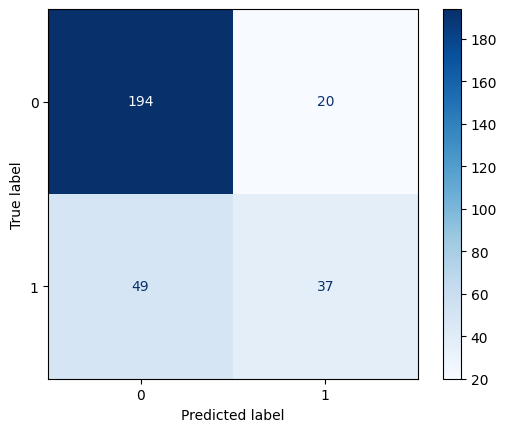

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Gera a matriz de confusão
matriz = confusion_matrix(teste_y, previsoes)

# Plota com ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=matriz)
disp.plot(cmap='Blues', values_format='.3g')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(teste_y, previsoes))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       214
           1       0.65      0.43      0.52        86

    accuracy                           0.77       300
   macro avg       0.72      0.67      0.68       300
weighted avg       0.76      0.77      0.75       300



Classification Report


In [112]:
from sklearn.metrics import classification_report
print(classification_report(teste_y, previsoes))



              precision    recall  f1-score   support

           0       0.80      0.91      0.85       214
           1       0.65      0.43      0.52        86

    accuracy                           0.77       300
   macro avg       0.72      0.67      0.68       300
weighted avg       0.76      0.77      0.75       300



Curva ROC

Avaliando o desempenho do nodel a partir da relação entre a taxa de verdadeiros positvos (sensibilidade) e a taxa de falsos positivos (especificidade) para diferentes limites.

**especifificidade** = VN/VN+FP
<p>Verdadeiros negativos divido por verdadeiros negativos mais falsos positivos
<p>Calcula a taxa que a categoria 1 foi classificada errada.


**Sensibilidade** = VP/VP+FN
<p>Verdadeiros posivitos dividido por verdadeiros posivitos mais falsos negativos

<p>Taxa de casos que a categoria 1 foi classificada corretamente

roc_auc 0.7589654422951532


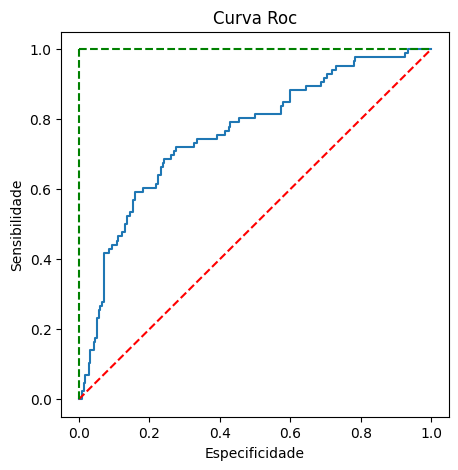

In [125]:
from sklearn.metrics import roc_curve, roc_auc_score

prob_previsao = modelo.predict_proba(teste_x)[:,1]


#tfp = taxa de falsos posivitos
#tvp = taxa verdadeiros positivos

tfp, tvp, limite = roc_curve(teste_y, prob_previsao)
print('roc_auc', roc_auc_score(teste_y, prob_previsao))

plt.subplots(1, figsize=(5,5))
plt.title('Curva Roc')
plt.plot(tfp, tvp)
plt.xlabel('Especificidade')
plt.ylabel('Sensibilidade')
plt.plot([0,1], ls="--", c = 'red') #Linhas pontilhadas na cor vermelha
plt.plot([0,0], [1,0], ls="--", c = 'green'), plt.plot([1,1], ls="--", c = 'green') #linhas pontilhadas da cor verde
plt.show()